C1 = 1.3333333333333333
C2 = 0
C3 = 4.666666666666667
C4 = -4


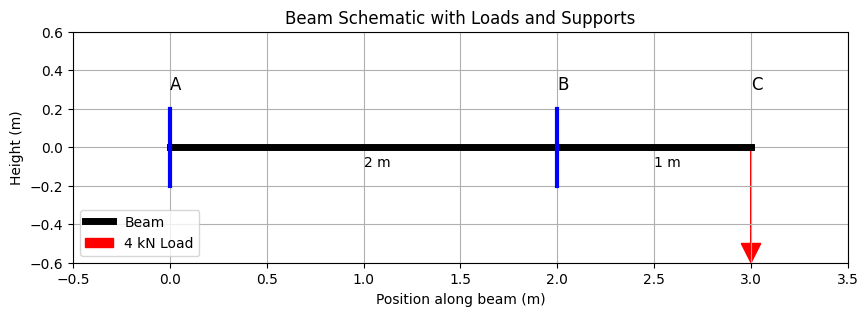

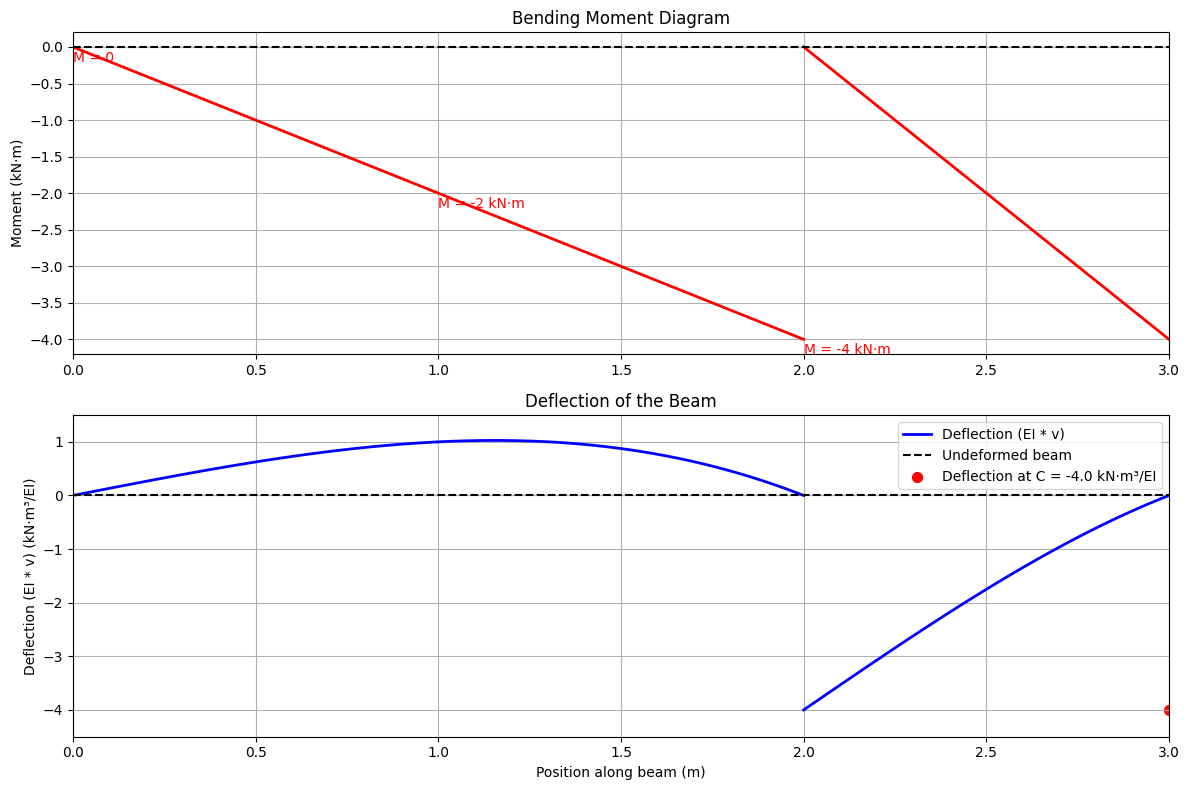

The deflection at C is v_C = -4.0 kN·m³/EI


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Solve for constants
C2 = 0
C1 = 4/3
C3 = 14/3
C4 = -4

print(f"C1 = {C1}")
print(f"C2 = {C2}")
print(f"C3 = {C3}")
print(f"C4 = {C4}")

# Step 2: Define the deflection functions
# For segment AB (0 <= x1 <= 2 m)
# EI * v1 = -(1/3)*x1^3 + C1*x1 + C2
x1 = np.linspace(0, 2, 100)
EI_v1 = -(1/3) * x1**3 + C1 * x1 + C2

# For segment BC (0 <= x2 <= 1 m)
# EI * v2 = -(2/3)*x2^3 + C3*x2 + C4
x2 = np.linspace(0, 1, 50)
EI_v2 = -(2/3) * x2**3 + C3 * x2 + C4

# Step 3: Define the moment functions
# For segment AB: M1 = -2x1
M1 = -2 * x1

# For segment BC: M2 = -4x2
M2 = -4 * x2

# Step 4: Plot the beam schematic
plt.figure(figsize=(10, 3))
plt.plot([0, 3], [0, 0], 'k-', linewidth=5, label='Beam')  # Beam line
plt.plot([0, 0], [-0.2, 0.2], 'b-', linewidth=3)  # Roller at A
plt.plot([2, 2], [-0.2, 0.2], 'b-', linewidth=3)  # Roller at B
plt.arrow(3, 0, 0, -0.5, head_width=0.1, head_length=0.1, fc='r', ec='r', label='4 kN Load')  # Load at C
plt.text(0, 0.3, 'A', fontsize=12)
plt.text(2, 0.3, 'B', fontsize=12)
plt.text(3, 0.3, 'C', fontsize=12)
plt.text(1, -0.1, '2 m', fontsize=10)
plt.text(2.5, -0.1, '1 m', fontsize=10)
plt.title('Beam Schematic with Loads and Supports')
plt.xlabel('Position along beam (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.legend()
plt.axis([-0.5, 3.5, -0.6, 0.6])
plt.show()

# Step 5: Create a figure with two subplots - Moment Diagram and Deflection Curve
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot Moment Diagram (top subplot)
ax1.plot(x1, M1, 'r-', linewidth=2)
x_global_BC = 2 + x2  # x2 is measured from B toward C
ax1.plot(x_global_BC, M2, 'r-', linewidth=2)
ax1.plot([0, 3], [0, 0], 'k--')  # Zero moment line
ax1.set_title('Bending Moment Diagram')
ax1.set_ylabel('Moment (kN·m)')
ax1.grid(True)
ax1.set_xlim(0, 3)
# Add annotations for moment values
ax1.text(2, -4.2, 'M = -4 kN·m', color='r', fontsize=10)
ax1.text(1, -2.2, 'M = -2 kN·m', color='r', fontsize=10)
ax1.text(0, -0.2, 'M = 0', color='r', fontsize=10)

# Plot Deflection Curve (bottom subplot)
ax2.plot(x1, EI_v1, 'b-', linewidth=2, label='Deflection (EI * v)')
ax2.plot(x_global_BC, EI_v2, 'b-', linewidth=2)  # Continue the same line
ax2.plot([0, 3], [0, 0], 'k--', label='Undeformed beam')  # Zero deflection line
ax2.scatter([3], [C4], color='red', s=50, label=f'Deflection at C = {C4:.1f} kN·m³/EI')
ax2.set_title('Deflection of the Beam')
ax2.set_xlabel('Position along beam (m)')
ax2.set_ylabel('Deflection (EI * v) (kN·m³/EI)')
ax2.grid(True)
ax2.legend()
ax2.set_xlim(0, 3)
ax2.set_ylim(-4.5, 1.5)  # Adjust y-axis limits to show the full deflection

plt.tight_layout()
plt.show()

# Step 6: Print the deflection at C
v_C = C4  # Deflection at C is simply C4 = -4.0
print(f"The deflection at C is v_C = {v_C:.1f} kN·m³/EI")